### 그래프 인접 행렬 표현과 최단 경로 문제
#### 최단 경로 문제
- 가중치 그래프에서 두 정점을 연결하는 여러 경로들 중에서 간선들의 가중치 합이 최소가 되는 경로를 찾는 문제
- 예 : '최단시간 경로', '최단 거리 경로' 등
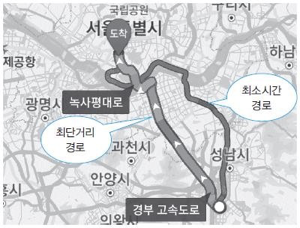


### 인접 행렬을 이용한 가중치 그래프의 표현
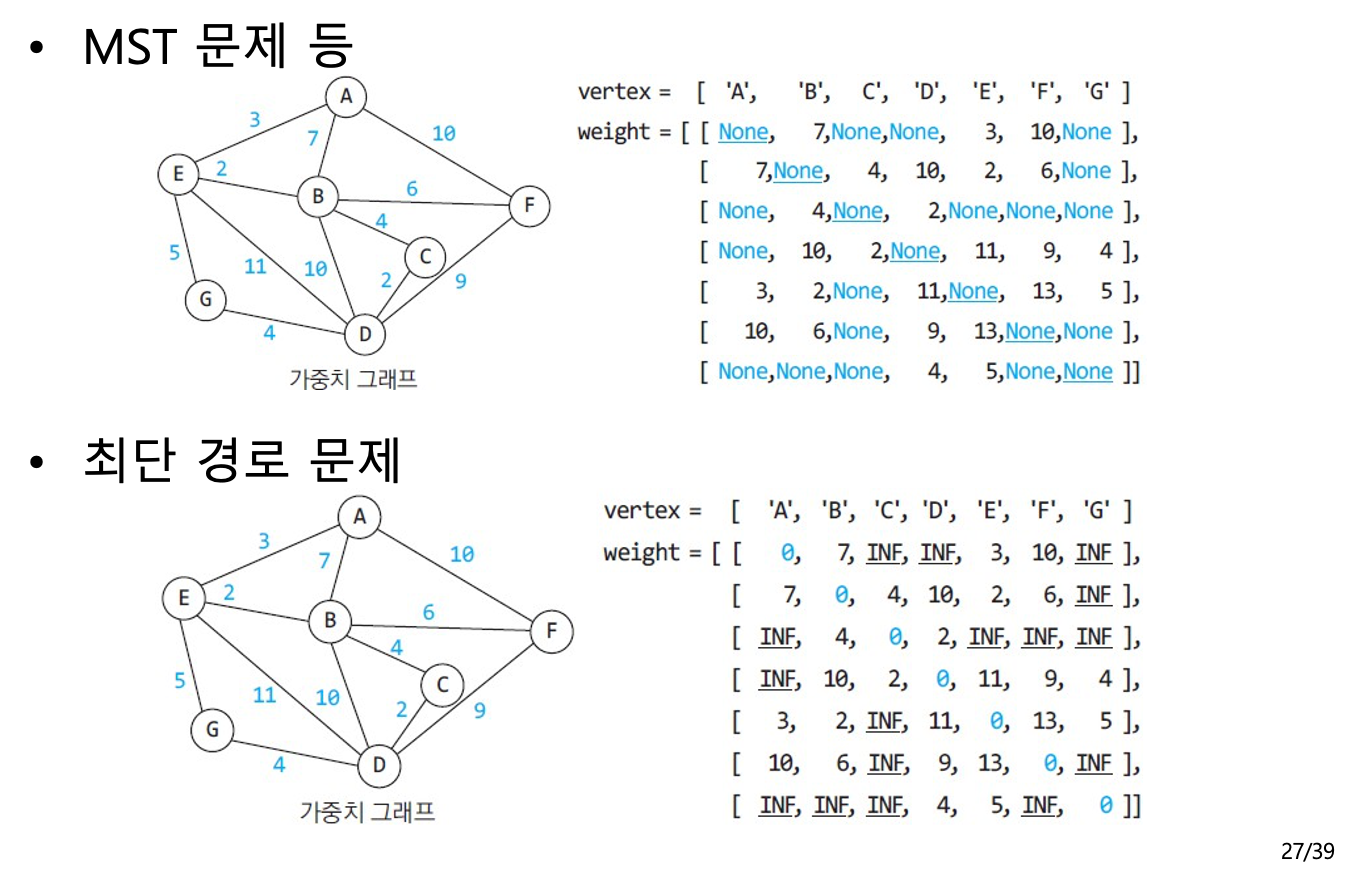
### MST 최소비용 신장 트리 문제들
### 대칭행렬: MST 9장 TSP(외판원)문제



### 최단 경로 문제 (어떤 정점에서 자기 자신으로 가는 거리 None 보다 0로 표현 간선X, INF)

### 최단 거리 문제의 종류
### 문제1) 시작 정점에서 도착 정점까지의 최단 경로 길이
- 시작 정점과 도착 정점이 정해진 경우
- 가능한 여러 경로들 중에서 가중치의 합이 최소인 경로와 비용 찾기
### 문제2) 시작 정점에서 모든 정점까지의 최단 경로 길이
- 시작 정점만 주어지고 이 정점에서 모든 정점 까지의 최단 경로
### 이 문제에 대한 대표적인 방법 -> Dijkstra 알고리즘 (8장)
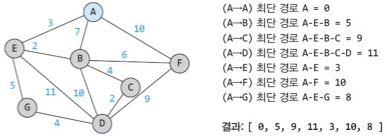

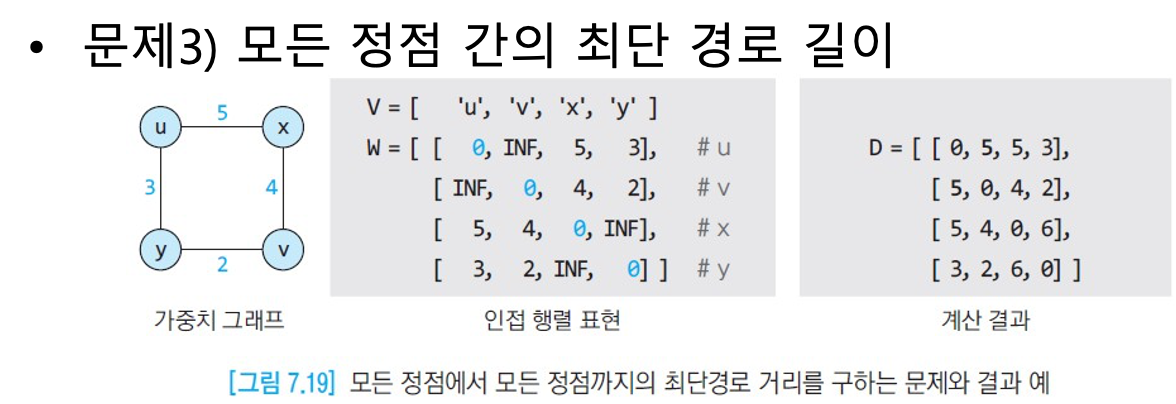



### 7.6 모든 정점간의 최단 경로 길이
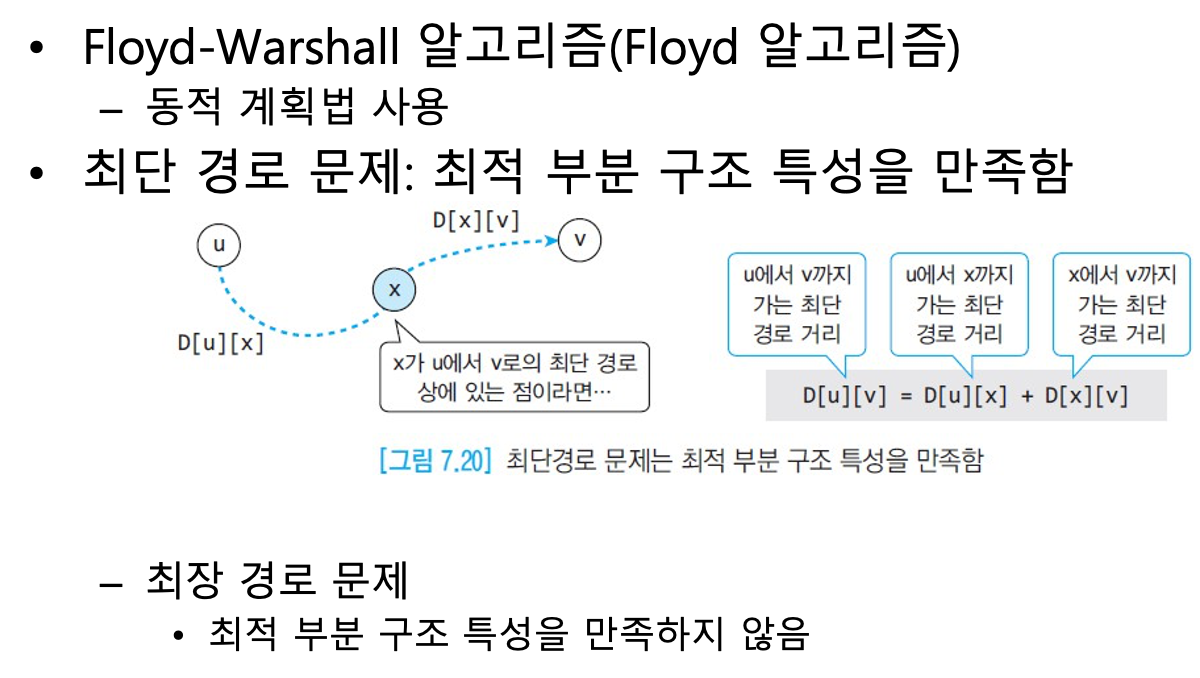
### 동적계획법을 사용해서 모든 정점에서 다른 모든 정점까지의 최단 경로를 한꺼번에 구하기
### 최단 경로 문제: 최적 부분 구조 특성을 만족함

### u-X로의 최단 경로와 x-v로의 최단 경로의 합
### 순환관계식 
- 인정행렬 표현 그래프 W-> 최단 거리행렬 D 구하기
- D^k[i][j] : 1~k 번째 정점까지 만을 이용한 정점 (i->j의 최단경로)
- 최적해 : D^n

### 동적 계회 전략
### D^0 -> D^1 -> D^2 -> D^3 -> D^N
### 기반상황
### 𝐷0 : 아무런 정점을 거치지 않는 경로 -> W

### 일반상황
### 𝐷𝑘  : 𝑘까지의 정점만을 이용한 부분 문제의 최적해
### 𝐷𝑘−1이 구해진 상태에서 𝑘 번째 정점을 고려할때
### 후보1: 𝑘 를 거치지 않는 경로
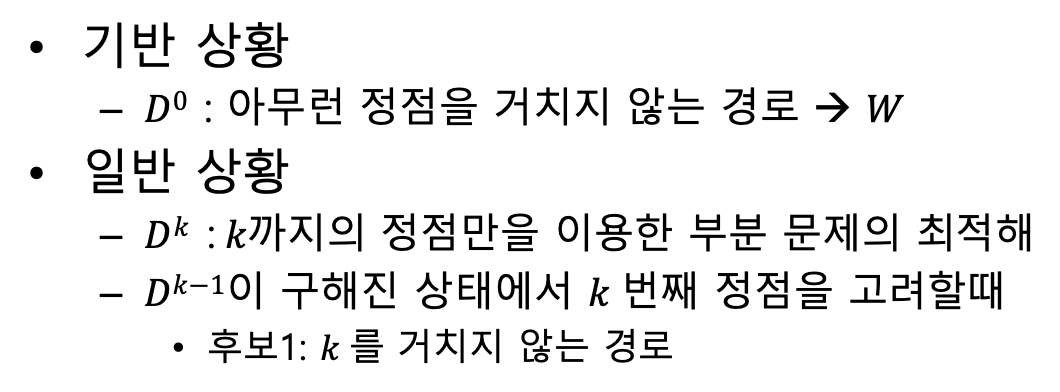


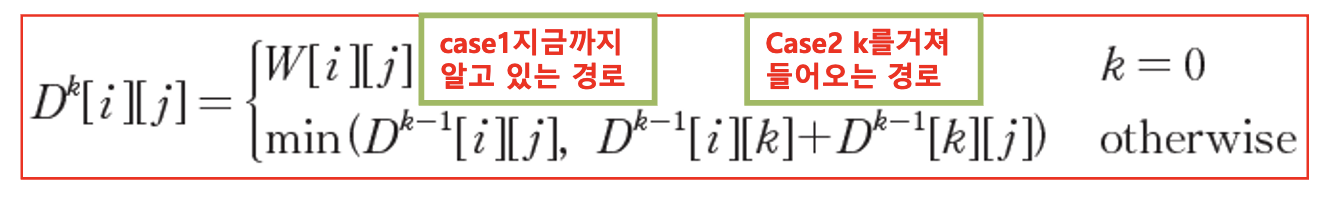


In [ ]:
import copy             # 리스트의 깊은 복사를 위해 사용

def shortest_path_floyd(vertex, W):   # Floyd의 최단경로탐색 함수.

    vsize = len(vertex)       # 정점의 개수

    D = copy.deepcopy(W)         # 깊은 복사

 

    for k in range(vsize) :       # 정점 k를 추가할 때

        for i in range(vsize) :

            for j in range(vsize) :  # 모든 D[i][j] 갱신

                if (D[i][k] + D[k][j] < D[i][j]) :

                    D[i][j] = D[i][k] + D[k][j]

        printD(D)    # 현재 D 행렬 출력 

 

 

def printD(D):   # 현재의 최단거리 행렬 D를 화면에 출력하는 함수

    vsize = len(D)

    print("====================================")

    for i in range(vsize) :

        for j in range(vsize) :

            if (D[i][j] == INF) : print(" INF ", end='')

            else : print("%4d "%D[i][j], end='')

        print("")

 

 

INF = 9999

vertex =   [  'A', 'B', 'C', 'D', 'E', 'F', 'G' ]

weight = [ [    0,   7, INF, INF,   3,  10, INF ],

           [    7,   0,   4,  10,   2,   6, INF ],

           [  INF,   4,   0,   2, INF, INF, INF ],

           [  INF,  10,   2,   0,  11,   9,   4 ],

           [    3,   2, INF,  11,   0,  13,   5 ],

           [   10,   6, INF,   9,  13,   0, INF ],

           [  INF, INF, INF,   4,   5, INF,   0 ]]

print("Shortest Path By Floyd's Algorithm")

shortest_path_floyd(vertex, weight)

### 알고리즘 3증루프
### 복잡도: O(n^3) , Dijkstra 알고리즘(8장) O(n^2)
- Dijkstra 알고리즘은 하나의 정점에서 모든 정점까지 최단 경로 찾는 방법
### 하지만 플로이드 알고리즘 모든 정점에서 (n) 모든 정점까지 최단 경로 찾는 시간
### 따라서 두 알고리즘 차이 X, Floyd 알고리즘은 매우 간결한 반복구문 사용

## 7.7 편집거리
### 2개의 문자열에서 하나의 문자열 수정하여 다른 문자열 생성하는 문제를 배경으로
### 편집거리: 단어의 철자 오류 찾기, 자연어 번역, 유전자의 유사도 측정에 사용
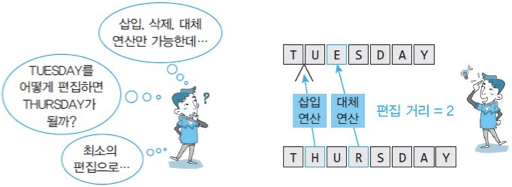
### tuesday => thursday 편집거리 2, cat => cut 편집거리 1
### 입력: 길이가 각각 m,n인 두 문자열 S와 T => E_ST(m,n)

### 순환관계식
### 기반상황 ( 두 문자열중 하나가 공백, 공백아닌 문자열을 모두 공배 문자열에 삽입)
#### E_ST (m, 0)=m
#### E_ST (0, n)=n
### 일반 상황: S[m], T[n](두 문자열 S,T의 맨 오른쪽 문자) 


### Case1: S[m]=T[n]
- E_ST (m, n)=E_ST (m-1, n-1)두 마지막 문자 같은 경우 (편집 x) 남은 문자열만 고려
###  Case2: S[m]  != T[n] 두 마지막 문자 같지 않은 경우 3가지 연산 가능
#### 대체 연산: S[m]을 T[n] 으로 대체 
- E_ST (m-1, n-1) + 1 
#### 삭제 연산: S[m]을 삭제 
- E_ST (m-1, n) + 1
### 삽입 연산: T[n]을 S 에 삽입
- E_ST (m, n-1) + 1
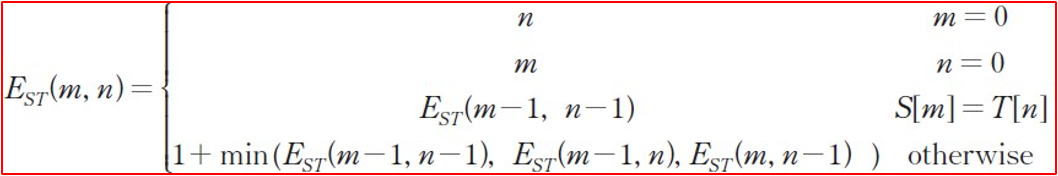


In [3]:
def edit_distance(S, T, m, n):

    if m == 0: return n    # S가 공백이면, T의 모든 문자를 S에 삽입

    if n == 0: return m       # T가 공백이면, S의 모든 문자들을 삭제

  

    if S[m-1]== T[n-1]:       # 마지막 문자가 같으면, 이 문자들 무시

        return edit_distance(S, T, m-1, n-1) 

 

    # 만약 그렇지 않으면, 세 연산을 모두 적용해 봄

    return 1 + min(edit_distance(S, T, m, n-1), # 삽입

                   edit_distance(S, T, m-1, n), # 삭제

                   edit_distance(S, T, m-1, n-1))  # 대체 

 
def edit_distance_mem(S, T, m, n, mem): 
    if m == 0: return n     # S가 공백이면, T의 모든 문자를 S에 삽입
    if n == 0: return m      # T가 공백이면, S의 모든 문자들을 삭제
    if mem[m-1][n-1] == None : # 아직 해결되지 않은 문제이면
        if S[m-1]== T[n-1]:  # S와 T의 마지막 문자가 같으면,
            mem[m-1][n-1] = edit_distance_mem(S, T, m-1, n-1, mem) 
        else:  # 그렇지 않으면, 세 연산을 모두 적용하
            mem[m-1][n-1] = 1 + \
               min( edit_distance_mem(S, T, m, n-1, mem),      # 삽입
                    edit_distance_mem(S, T, m-1, n, mem),      # 삭제
                    edit_distance_mem(S, T, m-1, n-1, mem))    # 대체
        print("mem[%d][%d] = "%(m-1,n-1), mem[m-1][n-1])  # 저장 순서
    return mem[m-1][n-1]    # 해를 반환
S = "tuesday"
T = "thursday"
m = len(S)
n = len(T)
print("문자열: ", S, T)
print("편집거리(분할정복    )= ", edit_distance(S, T, m, n))
mem = [[None for _ in range(n)] for _ in range(m)] # 부분해 저장
dist = edit_distance_mem(S, T, m, n, mem)
print("편집거리(메모이제이션)= ", edit_distance_mem(S, T, m, n, mem))

문자열:  tuesday thursday
편집거리(분할정복    )=  2
mem[0][0] =  0
mem[1][0] =  1
mem[2][0] =  2
mem[0][1] =  1
mem[1][1] =  1
mem[2][1] =  2
mem[1][2] =  1
mem[2][2] =  2
mem[0][2] =  2
mem[0][3] =  3
mem[1][3] =  2
mem[2][3] =  2
mem[3][4] =  2
mem[4][5] =  2
mem[5][6] =  2
mem[6][7] =  2
편집거리(메모이제이션)=  2
